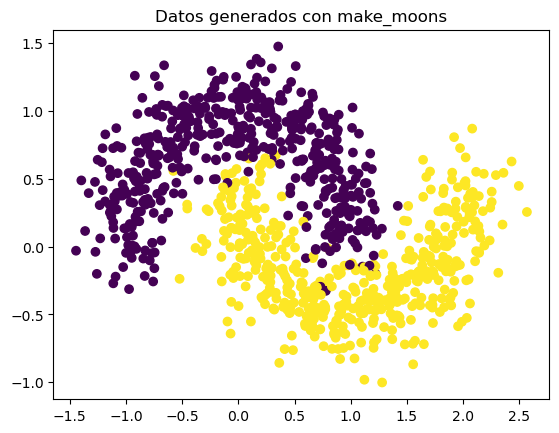

In [6]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Datos generados con make_moons")
plt.show()


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', solver='adam', max_iter=1000, random_state=42)
clf.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

In [9]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       100
           1       0.98      0.97      0.97       100

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200

Accuracy: 0.975


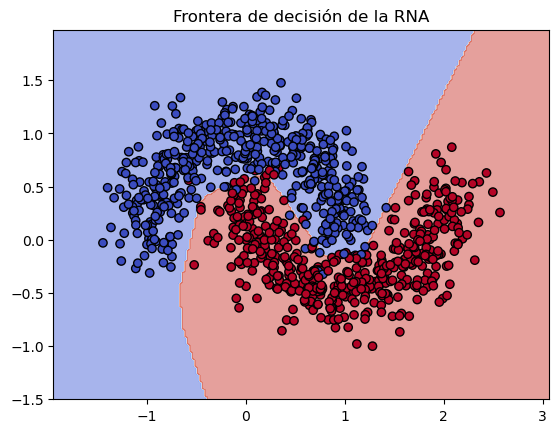

In [10]:
import numpy as np

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title("Frontera de decisión de la RNA")
    plt.show()

plot_decision_boundary(clf, X, y)